In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error
from regressors import stats

import seaborn as sns
sns.set(style="whitegrid", context="notebook")

In [2]:
data = load_iris()

print(data["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [4]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


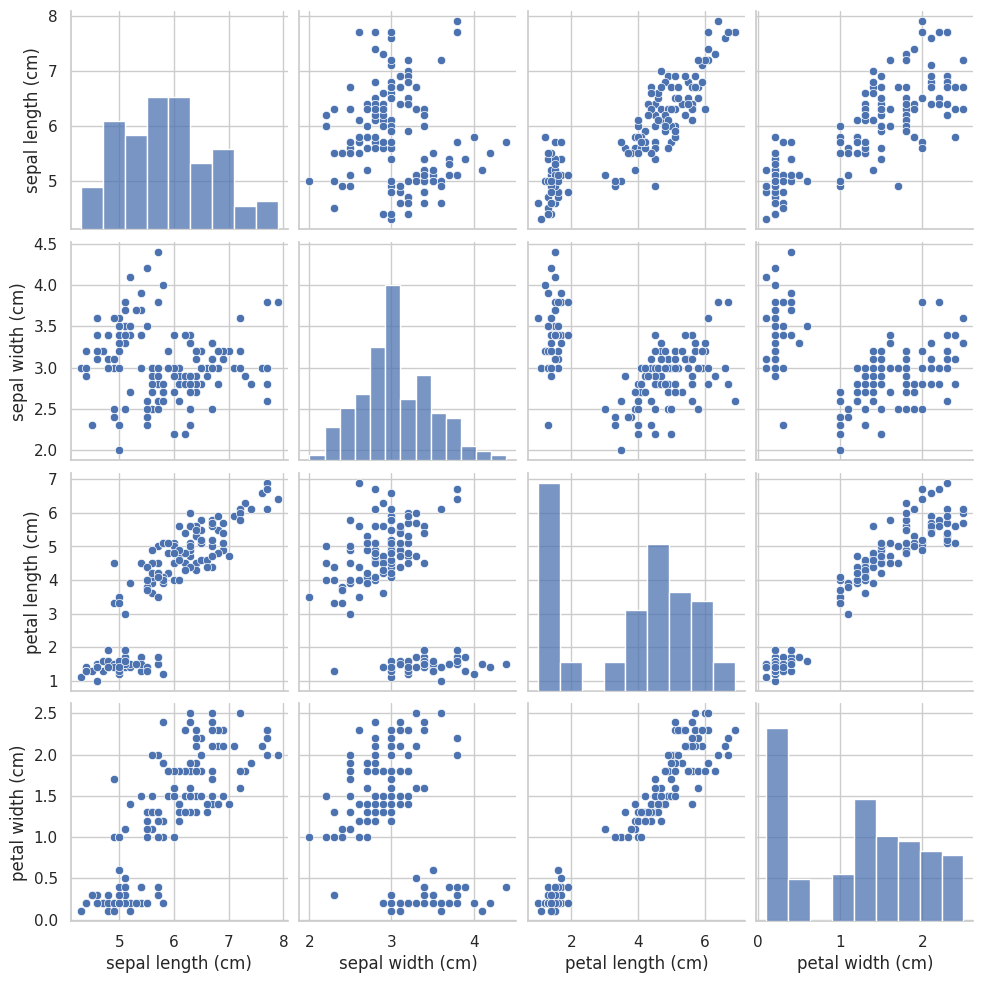

In [5]:
sns.pairplot(df)

<Axes: >

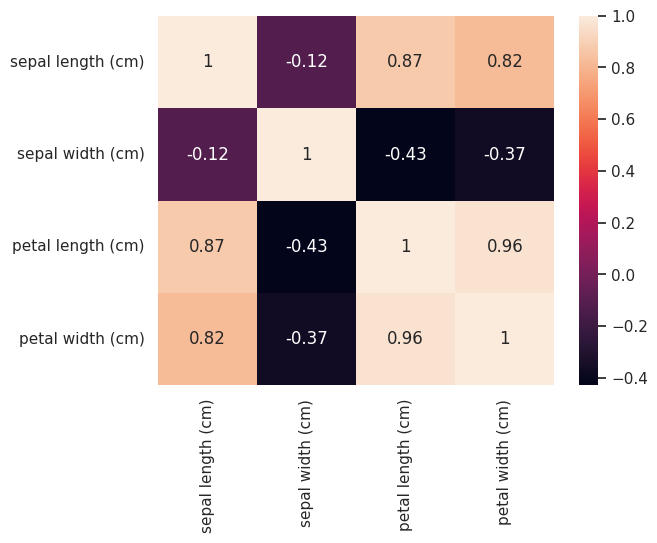

In [6]:
sns.heatmap(df.corr(), annot=True)

Tras un breve análisis visual y la exploración de las correlaciones entre las distintas variables, podemos implementar un primer modelo de regresión lineal univariado para predecir el petal width en función de la variable con la que mayor correlación tiene: petal length.

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [8]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
X, y = df["petal length (cm)"].values, df["petal width (cm)"].values

In [10]:
X_scaled = MinMaxScaler().fit_transform(X.reshape(-1, 1))
y_scaler = MinMaxScaler().fit(y.reshape(-1, 1))
y_scaled = y_scaler.transform(y.reshape(-1, 1))

In [11]:
mod = LinearRegression()
mod.fit(X_scaled, y_scaled)

LinearRegression()

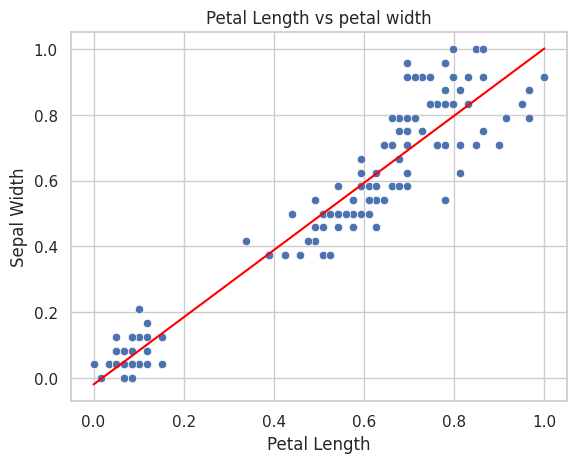

In [12]:
%matplotlib inline
plt.figure()
plt.title("Petal Length vs petal width")
sns.scatterplot(x=X_scaled.flatten(), y=y_scaled.flatten())
sns.lineplot(x=X_scaled.flatten(), y=mod.predict(X_scaled).flatten(), color="red")
plt.xlabel("Petal Length")
plt.ylabel("Sepal Width")
plt.show()

Estas predicciones, nótese, se hacen a nivel de las variables escaladas. ¿Cómo regresamos a la escala original de los datos?

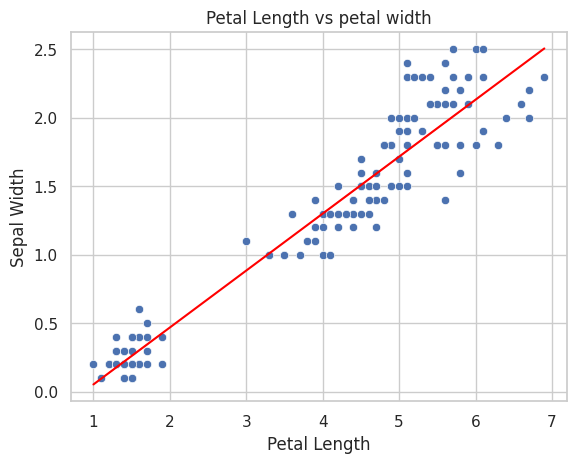

In [13]:
%matplotlib inline
plt.figure()
plt.title("Petal Length vs petal width")
sns.scatterplot(x=X, y=y)
sns.lineplot(x=X, y=y_scaler.inverse_transform(mod.predict(X_scaled)).flatten(), color="red")
plt.xlabel("Petal Length")
plt.ylabel("Sepal Width")
plt.show()

In [14]:
mean_squared_error(y, y_scaler.inverse_transform(mod.predict(X_scaled)).flatten())

0.042067309194993185

## Ahora, lo mismo, pero con más variables.

y = w0 * x0 + w1 * x1 + ... wn*xn + b

El modelo es capaz de encontrar el mejor plano n-dimensional que mejor se acomoda a los datos.

In [15]:
from sklearn.model_selection import train_test_split
multi_mod = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(df[["sepal length (cm)", "petal length (cm)"]].values, df["petal width (cm)"].values, test_size=0.2)

In [16]:
X_train_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_train_scaler.transform(X_train)
X_test_scaled = X_train_scaler.transform(X_test)

y_train_scaler = MinMaxScaler().fit(y_train.reshape(-1, 1))
y_train_scaled = y_train_scaler.transform(y_train.reshape(-1, 1))
y_test_scaled = y_train_scaler.transform(y_test.reshape(-1, 1))

In [17]:
multi_mod.fit(X_train_scaled, y_train_scaled)

LinearRegression()

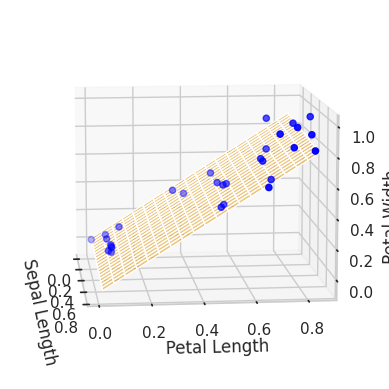

In [18]:
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], y_test_scaled.flatten(), color='blue')

x_grid, y_grid = np.meshgrid(
    np.linspace(X_test_scaled[:, 0].min(), X_test_scaled[:, 0].max(), 20),
    np.linspace(X_test_scaled[:, 1].min(), X_test_scaled[:, 1].max(), 20)
)
X_grid = np.c_[x_grid.ravel(), y_grid.ravel()]

z = multi_mod.predict(X_grid)
z = z.reshape(x_grid.shape)

ax.plot_surface(x_grid, y_grid, z, color='orange', alpha=0.5)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Length')
ax.set_zlabel('Petal Width')

ax.view_init(azim=-6, elev=10, roll=0)

plt.show()

Evaluando el modelo

In [19]:
multi_mod.coef_ = multi_mod.coef_.reshape(-1)
multi_mod.intercept_ = multi_mod.intercept_[0]
y_test_scaled = y_test_scaled.reshape(-1)

In [20]:
stats.summary(multi_mod, X_test_scaled, y_test_scaled, xlabels=["sepal length (cm)", "petal length (cm)"])

Residuals:
    Min      1Q  Median     3Q    Max
-0.2677 -0.0792 -0.0295 0.0211 0.1375


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept        -0.007064    0.032181  -0.2195  0.827792
sepal length (cm) -0.081710    0.162231  -0.5037  0.618303
petal length (cm)  1.050973    0.103062  10.1974  0.000000
---
R-squared:  0.90605,    Adjusted R-squared:  0.89909
F-statistic: 130.19 on 2 features


The p-value is a statistical measure that helps you determine whether there is evidence to reject the null hypothesis in a hypothesis test. In the context of linear regression, it helps you understand the significance of each predictor variable.

Null Hypothesis (H0): The coefficient of the predictor variable is equal to zero (i.e., the variable has no effect).
Alternative Hypothesis (H1): The coefficient of the predictor variable is not equal to zero (i.e., the variable has an effect).
A low p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, suggesting that the predictor variable is significantly related to the dependent variable.

In [21]:
df_with_madeup_variables = df.copy()

df_with_madeup_variables["sepal area (cm^2)"] = df_with_madeup_variables["sepal length (cm)"] * df_with_madeup_variables["sepal width (cm)"]

df_with_madeup_variables["class"] = data.target
df_with_madeup_variables = pd.get_dummies(df_with_madeup_variables, columns=["class"]).apply(lambda x: x.astype(np.float64))
df_with_madeup_variables

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal area (cm^2),class_0,class_1,class_2
0,5.1,3.5,1.4,0.2,17.85,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,14.70,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,15.04,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,14.26,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,18.00,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,20.10,0.0,0.0,1.0
146,6.3,2.5,5.0,1.9,15.75,0.0,0.0,1.0
147,6.5,3.0,5.2,2.0,19.50,0.0,0.0,1.0
148,6.2,3.4,5.4,2.3,21.08,0.0,0.0,1.0


In [22]:
made_up_variables_mod = LinearRegression(fit_intercept=False)

X_made_up_train, X_made_up_test, y_made_up_train, y_made_up_test = train_test_split(df_with_madeup_variables.drop(columns=["petal width (cm)"]).values, df_with_madeup_variables["petal width (cm)"].values, test_size=0.2)

In [23]:
made_up_variables_mod.fit(X_made_up_train, y_made_up_train)

LinearRegression(fit_intercept=False)

In [24]:
made_up_variables_mod.coef_ = made_up_variables_mod.coef_.reshape(-1)
y_made_up_test = y_made_up_test.reshape(-1)

In [25]:
stats.summary(made_up_variables_mod, X_made_up_test, y_made_up_test, xlabels=df_with_madeup_variables.drop(columns=["petal width (cm)"]).columns)

Residuals:
   Min     1Q  Median     3Q  Max
-0.227 -0.045  0.0249 0.0991 0.23


Coefficients:
                   Estimate                                      Std. Error         t value   p value
_intercept         0.000000  1.024133e+06+1.600000e-                    05j  0.0000+0.0000j  1.000000
sepal length (cm) -0.115250  1.369910e-01+7.270000e-                    04j -0.8413+0.0045j  0.407073
sepal width (cm)   0.207787  3.399780e-01+8.400000e-                    05j  0.6112-0.0002j  0.545843
petal length (cm)  0.248422  4.878300e-02+5.700000e-                    04j  5.0917-0.0595j  0.000020
sepal area (cm^2)  0.006260  1.501600e-02+4.352000e-                    03j  0.3846-0.1115j  0.691812
class_0           -0.348526  1.024132e+06-3.000000e-                    05j -0.0000-0.0000j  1.000000
class_1            0.273720  1.024131e+06+1.300000e-                    05j  0.0000-0.0000j  1.000000
class_2            0.667359  1.024131e+06+3.700000e-                    05j  0.0000-0.000

In [26]:
mod_relevant_variables = LinearRegression(fit_intercept=False)

X_relevant_train, X_relevant_test, y_relevant_train, y_relevant_test = train_test_split(df_with_madeup_variables[["sepal length (cm)", "petal length (cm)", "sepal area (cm^2)"]].values, df_with_madeup_variables["petal width (cm)"].values, test_size=0.2)

In [27]:
mod_relevant_variables.fit(X_relevant_train, y_relevant_train)

LinearRegression(fit_intercept=False)

In [28]:
mod_relevant_variables.coef_ = mod_relevant_variables.coef_.reshape(-1)
y_relevant_test = y_relevant_test.reshape(-1)

In [29]:
stats.summary(mod_relevant_variables, X_relevant_test, y_relevant_test, xlabels=["sepal length (cm)", "petal length (cm)", "sepal area (cm^2)"])

Residuals:
    Min      1Q  Median     3Q    Max
-0.6247 -0.1639 -0.0531 0.0541 0.4178


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.000000    0.617234   0.0000  1.000000
sepal length (cm) -0.201551    0.124848  -1.6144  0.117276
petal length (cm)  0.473187    0.042356  11.1716  0.000000
sepal area (cm^2)  0.032699    0.009577   3.4144  0.001908
---
R-squared:  0.89235,    Adjusted R-squared:  0.87992
F-statistic: 71.84 on 3 features


Nos estamos encontrando que a pesar de tomar únicamente las variables relevantes (p-value < 0.05) el R² disminuye. ¿Por qué?
Una de nuestras variables "relevantes" es "sepal area" que es la combinación de una variable muy relevante ("sepal length") y otra que no es nada relevante ("sepal width").
La variable combinada hereda la relevancia de "sepal length" pero también los errores que introduce "sepal width".

Al combinar variables habremos de escoger como input aquellas que sean relevantes.

In [30]:
mod_real_relevant_variables = LinearRegression(fit_intercept=False)

X_real_relevant_train, X_real_relevant_test, y_real_relevant_train, y_real_relevant_test = train_test_split(df_with_madeup_variables[["sepal length (cm)", "petal length (cm)"]].values, df_with_madeup_variables["petal width (cm)"].values, test_size=0.2)

In [31]:
mod_real_relevant_variables.fit(X_real_relevant_train, y_real_relevant_train)

LinearRegression(fit_intercept=False)

In [32]:
mod_real_relevant_variables.coef_ = mod_real_relevant_variables.coef_.reshape(-1)
y_real_relevant_test = y_real_relevant_test.reshape(-1)

In [33]:
stats.summary(mod_real_relevant_variables, X_real_relevant_test, y_real_relevant_test, xlabels=["sepal length (cm)", "petal length (cm)"])

Residuals:
    Min      1Q  Median     3Q    Max
-0.6077 -0.1569   0.016 0.1195 0.2298


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.000000    0.376406   0.0000  1.000000
sepal length (cm) -0.082178    0.031548  -2.6048  0.014351
petal length (cm)  0.444892    0.026741  16.6370  0.000000
---
R-squared:  0.92752,    Adjusted R-squared:  0.92215
F-statistic: 172.76 on 2 features


(0.9275224173304241, 0.892346072963175, 0.9794396953693468)


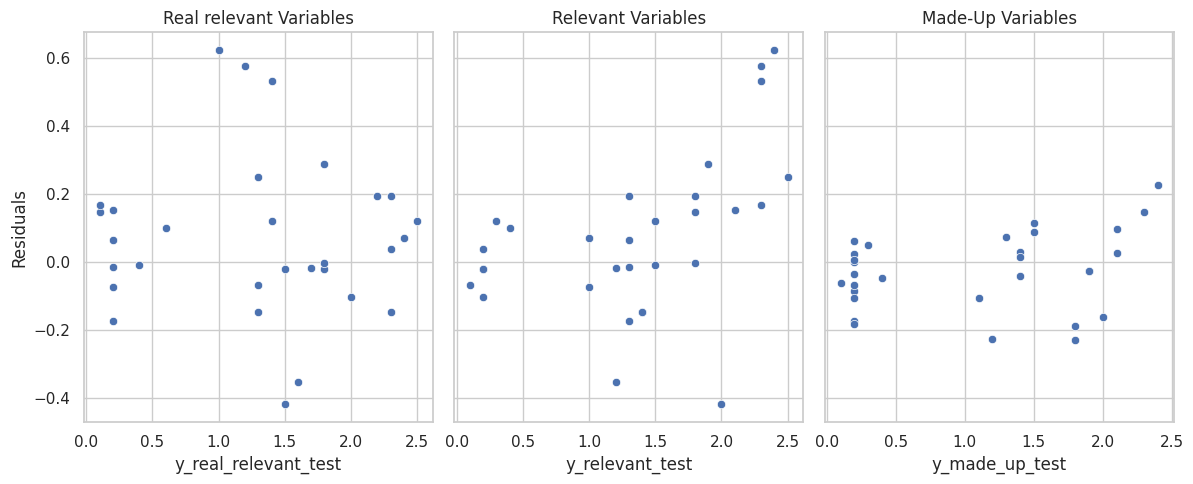

In [34]:
from sklearn.metrics import r2_score

residuals_relevant_variables = y_relevant_test - mod_relevant_variables.predict(X_relevant_test)
residuals_made_up_variables = y_made_up_test - made_up_variables_mod.predict(X_made_up_test)
residuals_real_relevant_variables = y_real_relevant_test - mod_real_relevant_variables.predict(X_real_relevant_test)

%matplotlib inline
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharey=True)

sns.scatterplot(x=y_real_relevant_test, y=residuals_relevant_variables, ax=axs[0])
axs[0].set_title('Real relevant Variables')
axs[0].set_xlabel('y_real_relevant_test')
axs[0].set_ylabel('Residuals')

sns.scatterplot(x=y_relevant_test, y=residuals_relevant_variables, ax=axs[1])
axs[1].set_title('Relevant Variables')
axs[1].set_xlabel('y_relevant_test')
axs[1].set_ylabel('Residuals')

# Plot for made-up variables
sns.scatterplot(x=y_made_up_test, y=residuals_made_up_variables, ax=axs[2])
axs[2].set_title('Made-Up Variables')
axs[2].set_xlabel('y_made_up_test')


print((r2_score(y_real_relevant_test, mod_real_relevant_variables.predict(X_real_relevant_test)),
r2_score(y_relevant_test, mod_relevant_variables.predict(X_relevant_test)),
r2_score(y_made_up_test, made_up_variables_mod.predict(X_made_up_test))))

plt.tight_layout()
plt.show()

Lo siguiente es algo extra. Quiero utilizar el modelo lineal para categorizar las flores y compararlo con una regresión logística.

In [35]:
df["class"] = data.target - 1

In [36]:
class_df = df[df["class"] >= 0]

In [37]:
class_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [38]:
class_mod = LinearRegression()

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

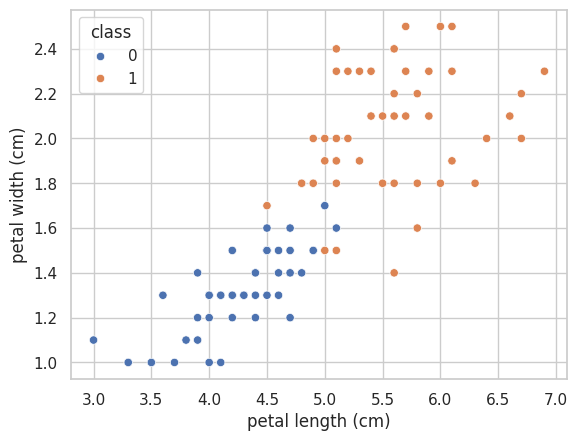

In [39]:
%matplotlib inline
plt.figure()
sns.scatterplot(x=class_df["petal length (cm)"], y=class_df["petal width (cm)"], hue=class_df["class"])

In [40]:
X_class, y_class = class_df[["petal length (cm)", "petal width (cm)"]].values, class_df["class"].values

In [41]:
class_mod.fit(X_class, y_class)

LinearRegression()

In [42]:
class_df["pred_value"] = class_mod.predict(X_class)
threshold = 0.5
class_df["pred_class"] = class_df["pred_value"].apply(lambda x: 1 if x > threshold else 0)

/tmp/ipykernel_5882/1068004368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df["pred_value"] = class_mod.predict(X_class)
/tmp/ipykernel_5882/1068004368.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df["pred_class"] = class_df["pred_value"].apply(lambda x: 1 if x > threshold else 0)


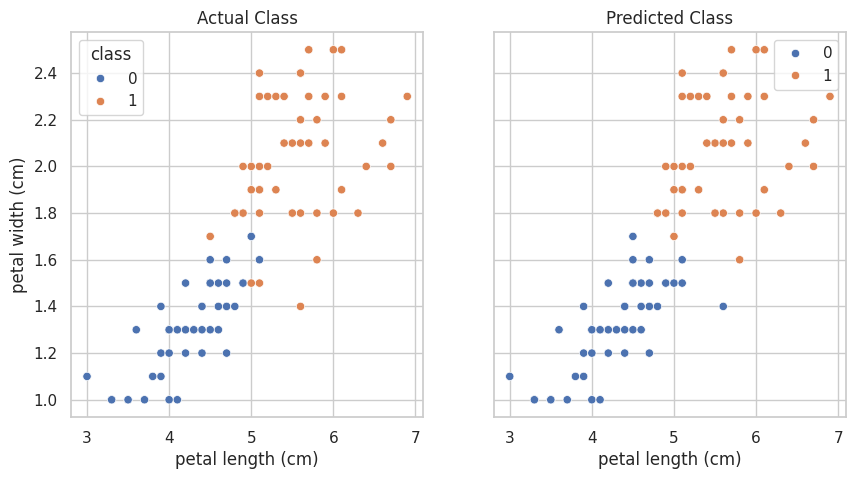

In [46]:
%matplotlib inline
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

sns.scatterplot(x=class_df["petal length (cm)"], y=class_df["petal width (cm)"], hue=class_df["class"], ax=axs[0])
axs[0].set_title('Actual Class')

sns.scatterplot(x=class_df["petal length (cm)"], y=class_df["petal width (cm)"], hue=class_df["pred_class"], ax=axs[1])
axs[1].set_title('Predicted Class')

plt.legend()
plt.show()


In [44]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

accuracy_score(class_df["class"], class_df["pred_class"]), recall_score(class_df["class"], class_df["pred_class"]), precision_score(class_df["class"], class_df["pred_class"])

(0.94, 0.92, 0.9583333333333334)

Este modelo de clasificación parece ser bastante bueno. ¿CUál es el mejor threshold?

Este sería un buen momento para investigar optuna para optimización de hiperparámetros o leer acerca de cómo encontrar el mejor valor para clasificación binaria.

¿Qué tal le va a un modelo de regresión logística?

In [130]:
from sklearn.linear_model import LogisticRegression

log_mod = LogisticRegression()

log_mod.fit(X_class, y_class)

class_df["pred_class_log"] = log_mod.predict(X_class)

accuracy_score(class_df["class"], class_df["pred_class_log"]), recall_score(class_df["class"], class_df["pred_class_log"]), precision_score(class_df["class"], class_df["pred_class_log"])

/tmp/ipykernel_102972/2510463646.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df["pred_class_log"] = log_mod.predict(X_class)


(0.95, 0.96, 0.9411764705882353)